In [12]:
import numpy as np
import pandas as pd
from scipy import interpolate
import matplotlib.pyplot as plt
from sklearn.metrics import auc

In [2]:
fpr_1 = np.load('fpr_1.npy')
tpr_1 = np.load('tpr_1.npy')

fpr_2 = np.load('fpr_2.npy')
tpr_2 = np.load('tpr_2.npy')

fpr_3 = np.load('fpr_3.npy')
tpr_3 = np.load('tpr_3.npy')

fpr_4 = np.load('fpr_4.npy')
tpr_4 = np.load('tpr_4.npy')

fpr_5 = np.load('fpr_5.npy')
tpr_5 = np.load('tpr_5.npy')

fpr_6 = np.load('fpr_6.npy')
tpr_6 = np.load('tpr_6.npy')

fpr_7 = np.load('fpr_7.npy')
tpr_7 = np.load('tpr_7.npy')

fpr_8 = np.load('fpr_8.npy')
tpr_8 = np.load('tpr_8.npy')

fpr_9 = np.load('fpr_9.npy')
tpr_9 = np.load('tpr_9.npy')

fpr_10 = np.load('fpr_10.npy')
tpr_10 = np.load('tpr_10.npy')

In [15]:
fpr_1 = pd.DataFrame(fpr_1) # 162rows
tpr_1 = pd.DataFrame(tpr_1) # 162rows

fpr_2 = pd.DataFrame(fpr_2) # 152rows
tpr_2 = pd.DataFrame(tpr_2) # 152rows

fpr_3 = pd.DataFrame(fpr_3) # 176rows
tpr_3 = pd.DataFrame(tpr_3) # 176rows

fpr_4 = pd.DataFrame(fpr_4) # 142rows
tpr_4 = pd.DataFrame(tpr_4) # 142rows

fpr_5 = pd.DataFrame(fpr_5) # 154rows
tpr_5 = pd.DataFrame(tpr_5) # 154rows

fpr_6 = pd.DataFrame(fpr_6) # 166rows
tpr_6 = pd.DataFrame(tpr_6) # 166rows

fpr_7 = pd.DataFrame(fpr_7) # 160rows
tpr_7 = pd.DataFrame(tpr_7) # 160rows

fpr_8 = pd.DataFrame(fpr_8) # 160rows
tpr_8 = pd.DataFrame(tpr_8) # 160rows

fpr_9 = pd.DataFrame(fpr_9) # 165rows
tpr_9 = pd.DataFrame(tpr_9) # 165rows

fpr_10 = pd.DataFrame(fpr_10) # 168rows
tpr_10 = pd.DataFrame(tpr_10) # 168rows

In [3]:
fpr_list = [fpr_1, fpr_2, fpr_3, fpr_4, fpr_5, fpr_6, fpr_7, fpr_8, fpr_9, fpr_10]
tpr_list = [tpr_1, tpr_2, tpr_3, tpr_4, tpr_5, tpr_6, tpr_7, tpr_8, tpr_9, tpr_10]

In [4]:
# 1. 找到最长的 fpr 的长度
max_length = max(len(fpr) for fpr in fpr_list)

In [7]:
# 2. 插值对齐
interpolated_fprs = []
for fpr in fpr_list:
    # 创建插值函数
    x_orig = np.linspace(0, 1, len(fpr))  # 原始 x 值
    f = interpolate.interp1d(x_orig, fpr, kind='linear')  # 线性插值
    # 插值到 max_length
    x_new = np.linspace(0, 1, max_length)
    interpolated_fpr = f(x_new)
    interpolated_fprs.append(interpolated_fpr)

# 3. 计算平均 fpr
average_fpr = np.mean(interpolated_fprs, axis=0)

In [8]:
average_fpr

array([0.        , 0.        , 0.        , 0.00135228, 0.00184162,
       0.00286767, 0.00365272, 0.00444936, 0.00540384, 0.00610366,
       0.00707708, 0.00776427, 0.00884083, 0.00963536, 0.0107477 ,
       0.01151802, 0.01256301, 0.01340384, 0.01429308, 0.01512655,
       0.01592213, 0.01683978, 0.01760168, 0.0186614 , 0.01948329,
       0.02038937, 0.02153433, 0.02281821, 0.02362431, 0.02481137,
       0.02549329, 0.02665614, 0.02738648, 0.02855459, 0.02944804,
       0.03093923, 0.03194843, 0.03294186, 0.0341005 , 0.03516864,
       0.03612733, 0.03737122, 0.03812155, 0.03941594, 0.0399537 ,
       0.04132597, 0.04212786, 0.04330966, 0.04398106, 0.04495764,
       0.04601421, 0.0469508 , 0.04780847, 0.04858932, 0.05002473,
       0.05088135, 0.0521768 , 0.05290502, 0.05394475, 0.05488977,
       0.05614838, 0.05749119, 0.0584804 , 0.06003683, 0.06109971,
       0.06278348, 0.06396001, 0.06528177, 0.06628361, 0.06741489,
       0.06836096, 0.06953433, 0.07030255, 0.07153486, 0.07283

In [8]:
average_fpr = pd.DataFrame(average_fpr)
average_fpr

,0
0,0.000000
1,0.000000
2,0.000000
3,0.001352
4,0.001842
...,...
171,0.624681
172,0.666283
173,0.777740
174,0.796411


In [9]:
# 1. 找到最长的 tpr 的长度
max_length_ = max(len(tpr) for tpr in tpr_list)

In [10]:
# 2. 插值对齐
interpolated_tprs = []
for tpr in tpr_list:
    # 创建插值函数
    x_orig = np.linspace(0, 1, len(tpr))  # 原始 x 值
    f = interpolate.interp1d(x_orig, tpr, kind='linear')  # 线性插值
    # 插值到 max_length
    x_new = np.linspace(0, 1, max_length_)
    interpolated_tpr = f(x_new)
    interpolated_tprs.append(interpolated_tpr)

# 3. 计算平均 fpr
average_tpr = np.mean(interpolated_tprs, axis=0)

In [11]:
average_tpr

array([0.        , 0.00167851, 0.17200421, 0.21086556, 0.27947488,
       0.3213628 , 0.36003999, 0.41029834, 0.42875664, 0.45726703,
       0.47422257, 0.4885588 , 0.49837306, 0.51912655, 0.53128545,
       0.54727703, 0.55933702, 0.57077085, 0.57835727, 0.58734859,
       0.60004736, 0.60718969, 0.61925388, 0.62372744, 0.63174323,
       0.63970008, 0.64702762, 0.651819  , 0.66328545, 0.66683925,
       0.67403315, 0.67698606, 0.68588582, 0.69027519, 0.6972523 ,
       0.70187845, 0.70830729, 0.71582215, 0.72129861, 0.72538806,
       0.73154959, 0.73363325, 0.738814  , 0.7417648 , 0.74569429,
       0.7482031 , 0.75843199, 0.76154801, 0.76742962, 0.77104972,
       0.7774533 , 0.78113549, 0.78582478, 0.78899448, 0.79149277,
       0.79596422, 0.80069982, 0.80425046, 0.80696974, 0.80916496,
       0.81379637, 0.81646304, 0.81993475, 0.82254144, 0.82806525,
       0.8299237 , 0.83311339, 0.8346151 , 0.83679979, 0.83893607,
       0.84305709, 0.84507551, 0.84976059, 0.85277453, 0.85600

In [12]:
average_tpr = pd.DataFrame(average_tpr)
average_tpr

,0
0,0.000000
1,0.001679
2,0.172004
3,0.210866
4,0.279475
...,...
171,0.996830
172,0.997825
173,0.998311
174,0.999827


In [13]:
from sklearn.metrics import roc_curve,precision_recall_curve,auc

In [14]:
auc(average_fpr, average_tpr)

0.96311526784163

In [40]:
average_tpr.to_csv('csv/tpr/average_tpr.csv', index=False, header=False)

In [17]:
def plot_roc_curves_with_average(fprs, tprs, average_fpr, average_tpr, title="ROC Curves (10-Fold Cross-Validation)"):
   """
   绘制十折交叉验证的ROC曲线，并将所有曲线和平均曲线绘制在一张图中。

   Args:
       fprs: 包含每一折的fpr列表 (list of numpy arrays)。
       tprs: 包含每一折的tpr列表 (list of numpy arrays)。
       average_fpr: 十折交叉验证的平均fpr (numpy array)。
       average_tpr: 十折交叉验证的平均tpr (numpy array)。
       title: 图的标题 (string)。
   """

   plt.figure(figsize=(10, 8))  # Adjust figure size as needed

   # 绘制每一折的ROC曲线
   for i in range(len(fprs)):
       roc_auc = auc(fprs[i], tprs[i])
       plt.plot(fprs[i], tprs[i], lw=1, alpha=0.3, label=f'Fold {i+1} (AUC = {roc_auc:.4f})')

   # 绘制平均ROC曲线
   average_roc_auc = auc(average_fpr, average_tpr)
   plt.plot(average_fpr, average_tpr, color='b', label=f'Average ROC (AUC = {average_roc_auc:.4f})', lw=2)

   # 绘制对角线
   plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance')

   # 设置图的属性
   plt.xlim([-0.05, 1.05])
   plt.ylim([-0.05, 1.05])
   plt.xlabel('False Positive Rate')
   plt.ylabel('True Positive Rate')
   plt.title(title)
   plt.legend(loc="lower right")
   plt.grid(True)  # Add grid for better readability
   plt.savefig('1.png',dpi=600, bbox_inches='tight', pad_inches=0.1)
   
   plt.show()

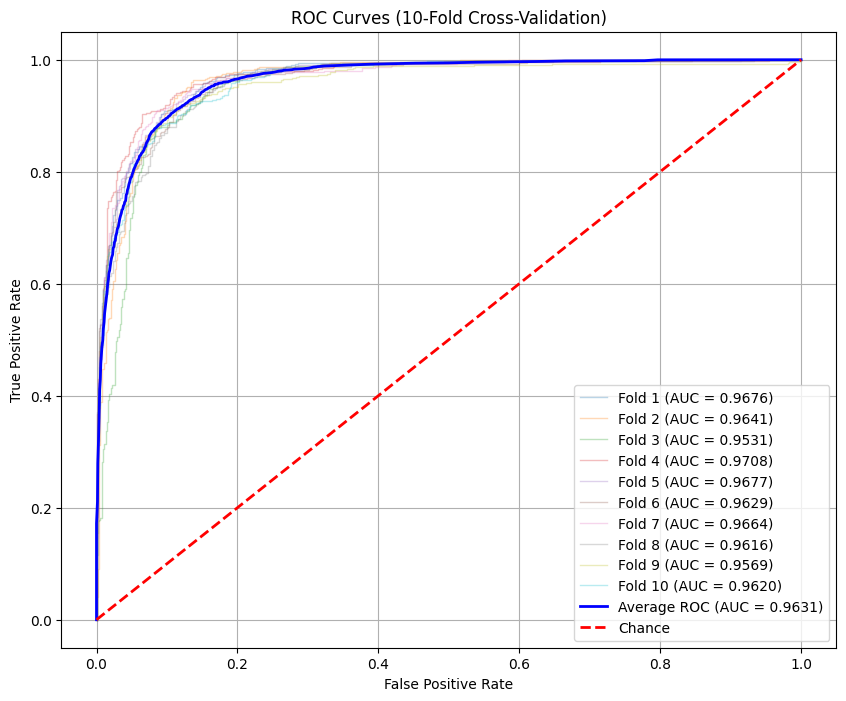

In [18]:
plot_roc_curves_with_average(fpr_list, tpr_list, average_fpr, average_tpr)

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn.metrics import auc

def plot_roc_curves_with_average(fprs, tprs, average_fpr, average_tpr, title="ROC Curves (10-Fold Cross-Validation)"):
    plt.figure(figsize=(10, 8))

    for i in range(len(fprs)):
        if fprs[i][0] > 0:
            fprs[i] = np.insert(fprs[i], 0, 0)
            tprs[i] = np.insert(tprs[i], 0, 0)
        if fprs[i][-1] < 1:
            fprs[i] = np.append(fprs[i], 1)
            tprs[i] = np.append(tprs[i], 1)

    max_len = max(len(fpr) for fpr in fprs)
    fpr_new = np.linspace(0, 1, max_len)

    tprs_interp = []

    for i in range(len(fprs)):
        roc_auc = auc(fprs[i], tprs[i])

        # 去除重复的 FPR 值
        unique_fpr, unique_indices = np.unique(fprs[i], return_index=True)
        unique_tpr = tprs[i][unique_indices]

        # 进行插值
        f = interp1d(unique_fpr, unique_tpr, kind='quadratic', fill_value="extrapolate")
        tpr_new = f(fpr_new)

        window_size = max(3, len(tpr_new) // 50)
        tpr_smooth = moving_average(tpr_new, window_size)

        tprs_interp.append(tpr_smooth)

        plt.plot(fpr_new, tpr_smooth, lw=1, alpha=0.3, label=f'Fold {i+1} (AUC = {roc_auc:.4f})')

    average_roc_auc = auc(average_fpr, average_tpr)

    unique_avg_fpr, unique_avg_indices = np.unique(average_fpr, return_index=True)
    unique_avg_tpr = average_tpr[unique_avg_indices]

    f_avg = interp1d(unique_avg_fpr, unique_avg_tpr, kind='quadratic', fill_value="extrapolate")
    tpr_avg_new = f_avg(fpr_new)
    tpr_avg_smooth = moving_average(tpr_avg_new, window_size)

    plt.plot(fpr_new, tpr_avg_smooth, color='b', label=f'Average ROC (AUC = {average_roc_auc:.4f})', lw=2)

    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance')

    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(True)

    plt.savefig('perfect_roc.png', dpi=600, bbox_inches='tight', pad_inches=0.1)
    plt.show()

def moving_average(data, window_size):
    if len(data) < window_size:
        return data
    window = np.ones(window_size) / window_size
    data_padded = np.pad(data, (window_size // 2, window_size - 1 - window_size // 2), mode='edge')
    return np.convolve(data_padded, window, mode='valid')



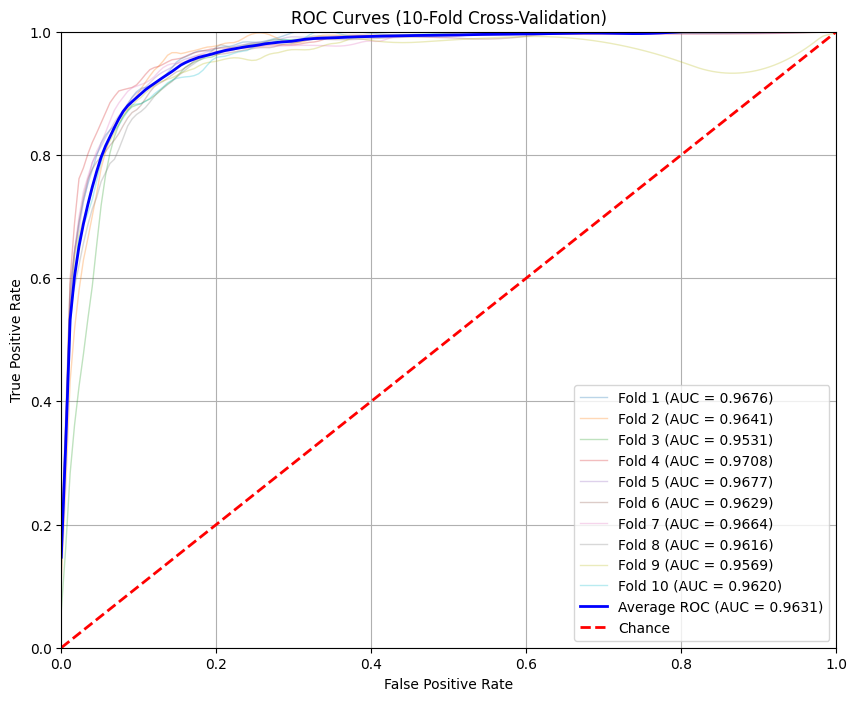

In [20]:
plot_roc_curves_with_average(fpr_list, tpr_list, average_fpr, average_tpr)

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from sklearn.metrics import auc

def moving_average(data, window_size):
    """ 使用移动平均平滑数据 """
    if len(data) < window_size:
        return data  # 数据太短，不进行平滑
    window = np.ones(window_size) / window_size
    data_padded = np.pad(data, (window_size // 2, window_size - 1 - window_size // 2), mode='edge')
    return np.convolve(data_padded, window, mode='valid')

def plot_roc_curves_with_average(fprs, tprs, average_fpr, average_tpr, title="ROC Curves (10-Fold Cross-Validation)"):
    plt.figure(figsize=(10, 8))

    all_fpr_tpr = {}  # 用于存储所有折的数据
    max_len = max(len(fpr) for fpr in fprs)  # 获取最长的 FPR 长度
    fpr_new = np.linspace(0, 1, max_len)  # 生成统一的 FPR 轴

    # 遍历每一折，进行插值和平滑
    for i in range(len(fprs)):
        roc_auc = auc(fprs[i], tprs[i])
        
        # 确保 FPR 具有唯一值
        unique_fpr, unique_indices = np.unique(fprs[i], return_index=True)
        unique_tpr = tprs[i][unique_indices]

        # 进行线性插值
        f = interp1d(unique_fpr, unique_tpr, kind='linear', fill_value="extrapolate")
        tpr_new = f(fpr_new)

        # 进行移动平均平滑
        window_size = max(3, len(tpr_new) // 50)
        tpr_smooth = moving_average(tpr_new, window_size)
        tpr_smooth = np.clip(tpr_smooth, 0, 1)  # 限制 TPR 范围

        # 绘制曲线
        plt.plot(fpr_new, tpr_smooth, lw=0.8, alpha=0.5, label=f'Fold {i+1} (AUC = {roc_auc:.4f})')

        # **存储数据**
        all_fpr_tpr[f'Fold_{i+1}_FPR'] = fpr_new
        all_fpr_tpr[f'Fold_{i+1}_TPR'] = tpr_smooth

    # 处理平均 ROC 曲线
    average_roc_auc = auc(average_fpr, average_tpr)
    unique_avg_fpr, unique_avg_indices = np.unique(average_fpr, return_index=True)
    unique_avg_tpr = average_tpr[unique_avg_indices]

    f_avg = interp1d(unique_avg_fpr, unique_avg_tpr, kind='linear', fill_value="extrapolate")
    tpr_avg_new = f_avg(fpr_new)
    tpr_avg_smooth = moving_average(tpr_avg_new, window_size)
    tpr_avg_smooth = np.clip(tpr_avg_smooth, 0, 1)  # 限制 TPR 范围

    # 绘制平均 ROC 曲线
    plt.plot(fpr_new, tpr_avg_smooth, color='blue', lw=3, label=f'Average ROC (AUC = {average_roc_auc:.4f})')

    # 绘制随机参考线
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance')

    # **设置图形参数**
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.grid(False)  # 取消网格

    # **保存图像**
    plt.savefig('perfect_roc_no_grid.png', dpi=600, bbox_inches='tight', pad_inches=0.1)
    plt.show()

    # **保存所有 FPR 和 TPR 到 CSV**
    all_fpr_tpr['Average_FPR'] = fpr_new
    all_fpr_tpr['Average_TPR'] = tpr_avg_smooth

    df_fpr_tpr = pd.DataFrame(all_fpr_tpr)
    df_fpr_tpr.to_csv("fpr_tpr_per_fold_with_average.csv", index=False)
    print("✅ FPR 和 TPR 已保存到 fpr_tpr_per_fold_with_average.csv")



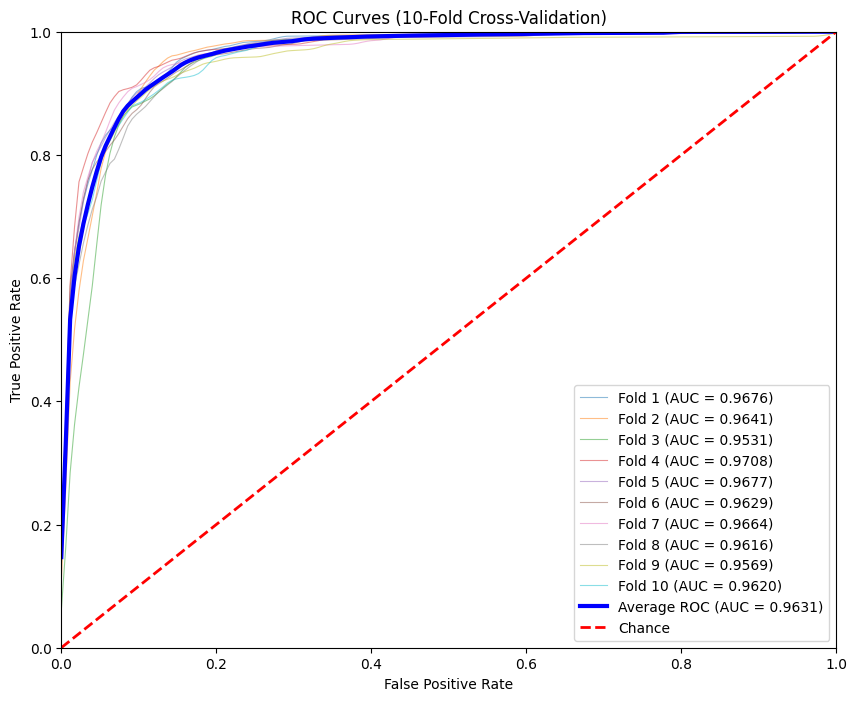

✅ FPR 和 TPR 已保存到 fpr_tpr_per_fold_with_average.csv


In [22]:
plot_roc_curves_with_average(fpr_list, tpr_list, average_fpr, average_tpr)

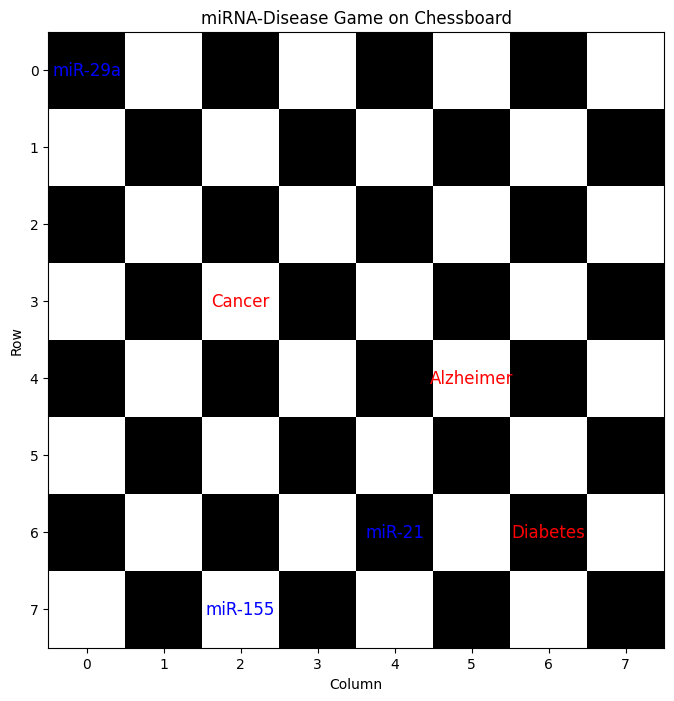

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# 1. 定义棋盘大小和棋子
board_size = 8  # 棋盘大小 (8x8)
miRNAs = ['miR-21', 'miR-155', 'miR-29a']
diseases = ['Cancer', 'Alzheimer', 'Diabetes']

# 2. 创建棋盘数据
board = np.zeros((board_size, board_size))
board[1::2, ::2] = 1  # 设置黑色格子
board[::2, 1::2] = 1

# 3. 创建棋子位置 (随机放置)
np.random.seed(42)  # 设置随机种子，保证结果可重复
miRNA_positions = np.random.choice(board_size * board_size, len(miRNAs), replace=False)
disease_positions = np.random.choice(board_size * board_size, len(diseases), replace=False)

miRNA_coords = [(pos // board_size, pos % board_size) for pos in miRNA_positions]
disease_coords = [(pos // board_size, pos % board_size) for pos in disease_positions]

# 4. 绘制棋盘
plt.figure(figsize=(8, 8))
plt.imshow(board, cmap='gray', interpolation='nearest')

# 5. 绘制棋子
for i, (row, col) in enumerate(miRNA_coords):
    plt.text(col, row, miRNAs[i], ha='center', va='center', color='blue', fontsize=12)

for i, (row, col) in enumerate(disease_coords):
    plt.text(col, row, diseases[i], ha='center', va='center', color='red', fontsize=12)

# 6. 设置坐标轴
plt.xticks(np.arange(board_size))
plt.yticks(np.arange(board_size))
plt.xlabel("Column")
plt.ylabel("Row")

# 7. 添加标题
plt.title('miRNA-Disease Game on Chessboard')

# 8. 显示图形
plt.show()
